<a href="https://colab.research.google.com/github/DerMilchShake/cluster/blob/main/hierarchisch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Bibliothek importieren**



In [1]:
 import matplotlib.pyplot as plt   
 import seaborn as sns; sns.set()  
 import numpy as np  
 import pandas as pd 
 import scipy.cluster.hierarchy as shc  
 from sklearn.cluster import KMeans 
 from sklearn.cluster import AgglomerativeClustering 
 %matplotlib inline

# **2. Daten einlesen und anzeigen**

In [2]:
 # Lese CSV-Datei mit Werten zur Clusteranalyse aus Github ein
 # in dem Fall: Raumklima-Datensatz mit Temperatur/Feuchtigkeit
 url = 'https://raw.githubusercontent.com/DerMilchShake/cluster/main/raumklima.csv'
 klima_data = pd.read_csv(url,sep=';', header=0)  
 
 # Merkmale/Variablen Feuchtigk. und Temp. separat speichern
 X = klima_data.iloc[:,[0,1]].copy() 
 
 # Wahre Zuordnung zu den Kategorien speichern
 cluster_true=klima_data.iloc[:,2].copy() 
 
 # Zeige ausgewählte Zeilen zur Kontrolle an 
 klima_data.head(10)

,Feuchte,Temp,Cluster
0,42,21,behaglich
1,45,19,behaglich
2,52,19,behaglich
3,55,21,behaglich
4,53,22,behaglich
5,69,23,zu feucht
6,80,21,zu feucht
7,81,23,zu feucht
8,73,25,zu feucht
9,75,25,zu feucht


# **3. Daten visualisieren**

<class 'numpy.ndarray'>


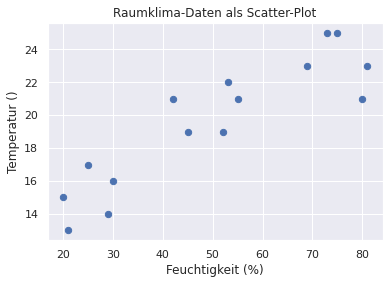

In [3]:
 X = np.array(X) # Typkonvertierung: DataFrame->Array  
 print(type(X))  
 # Daten visualisieren  
 plt.scatter(X[:,0], X[:,1],s=40);  
 plt.title('Raumklima-Daten als Scatter-Plot')  
 plt.xlabel('Feuchtigkeit (%)');plt.ylabel('Temperatur ()'); 

# **4. Clusteranalyse durchführen**

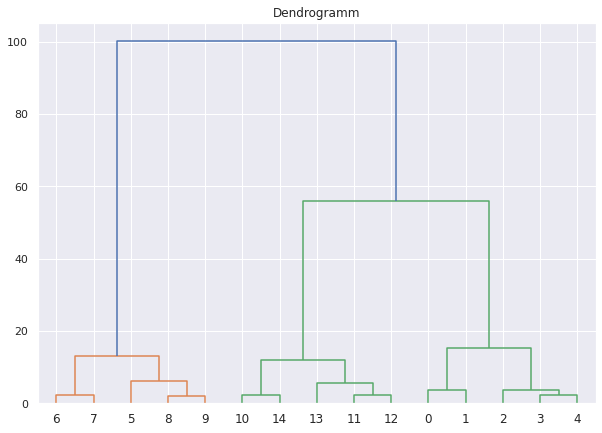

In [5]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogramm")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

# **5. Detailierte Clusteranalyse (Agglomerativ)**

In [7]:
# hierarchisches Modell festlegen, inkl. Anzahl der Cluster
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
 
# Vorhersage mittels des hierarchischen Modells
cluster = cluster.fit(X)
y_cluster = cluster.fit_predict(X)
 
# vorhergesagte Zuordnungen der Merkmalskombinationen zu den geschätzten Zentren
y_cluster #or:
# print(cluster.labels_)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

# **6. Zuordnung der Daten zu den Clustern visualisieren**

Text(0, 0.5, 'Temperatur(Celsius)')

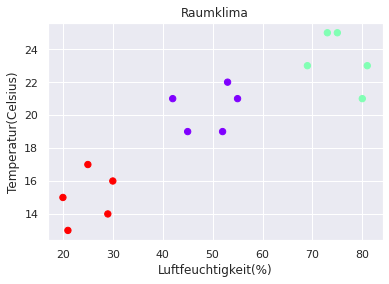

In [10]:
# Daten visualisieren: Merkmale
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, s=40, cmap='rainbow')
 
plt.title("Raumklima")
plt.xlabel("Luftfeuchtigkeit(%)")
plt.ylabel("Temperatur(Celsius)")